In [87]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import numpy as np
from scipy import stats
from numpy import polyfit

import seaborn as sns
sns.set_style('whitegrid', {'axes.grid' : False})

import matplotlib
import matplotlib.pyplot as plt
# plot settings
font = {'family' : 'Verdana',
        'weight' : 'regular',
        'size'   : 15}
figure = {'figsize' : (20,8)}
matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)

In [88]:
# Set up the simulation parameters
data_length = 10000 # length of data, in points
mu, sigma = 0, 0.1 # mean, std of simulated white noise
simulation_runs = 1000 # will end up doing 1000 resampling runs

-0.002361230274558803 0.8133598542269181


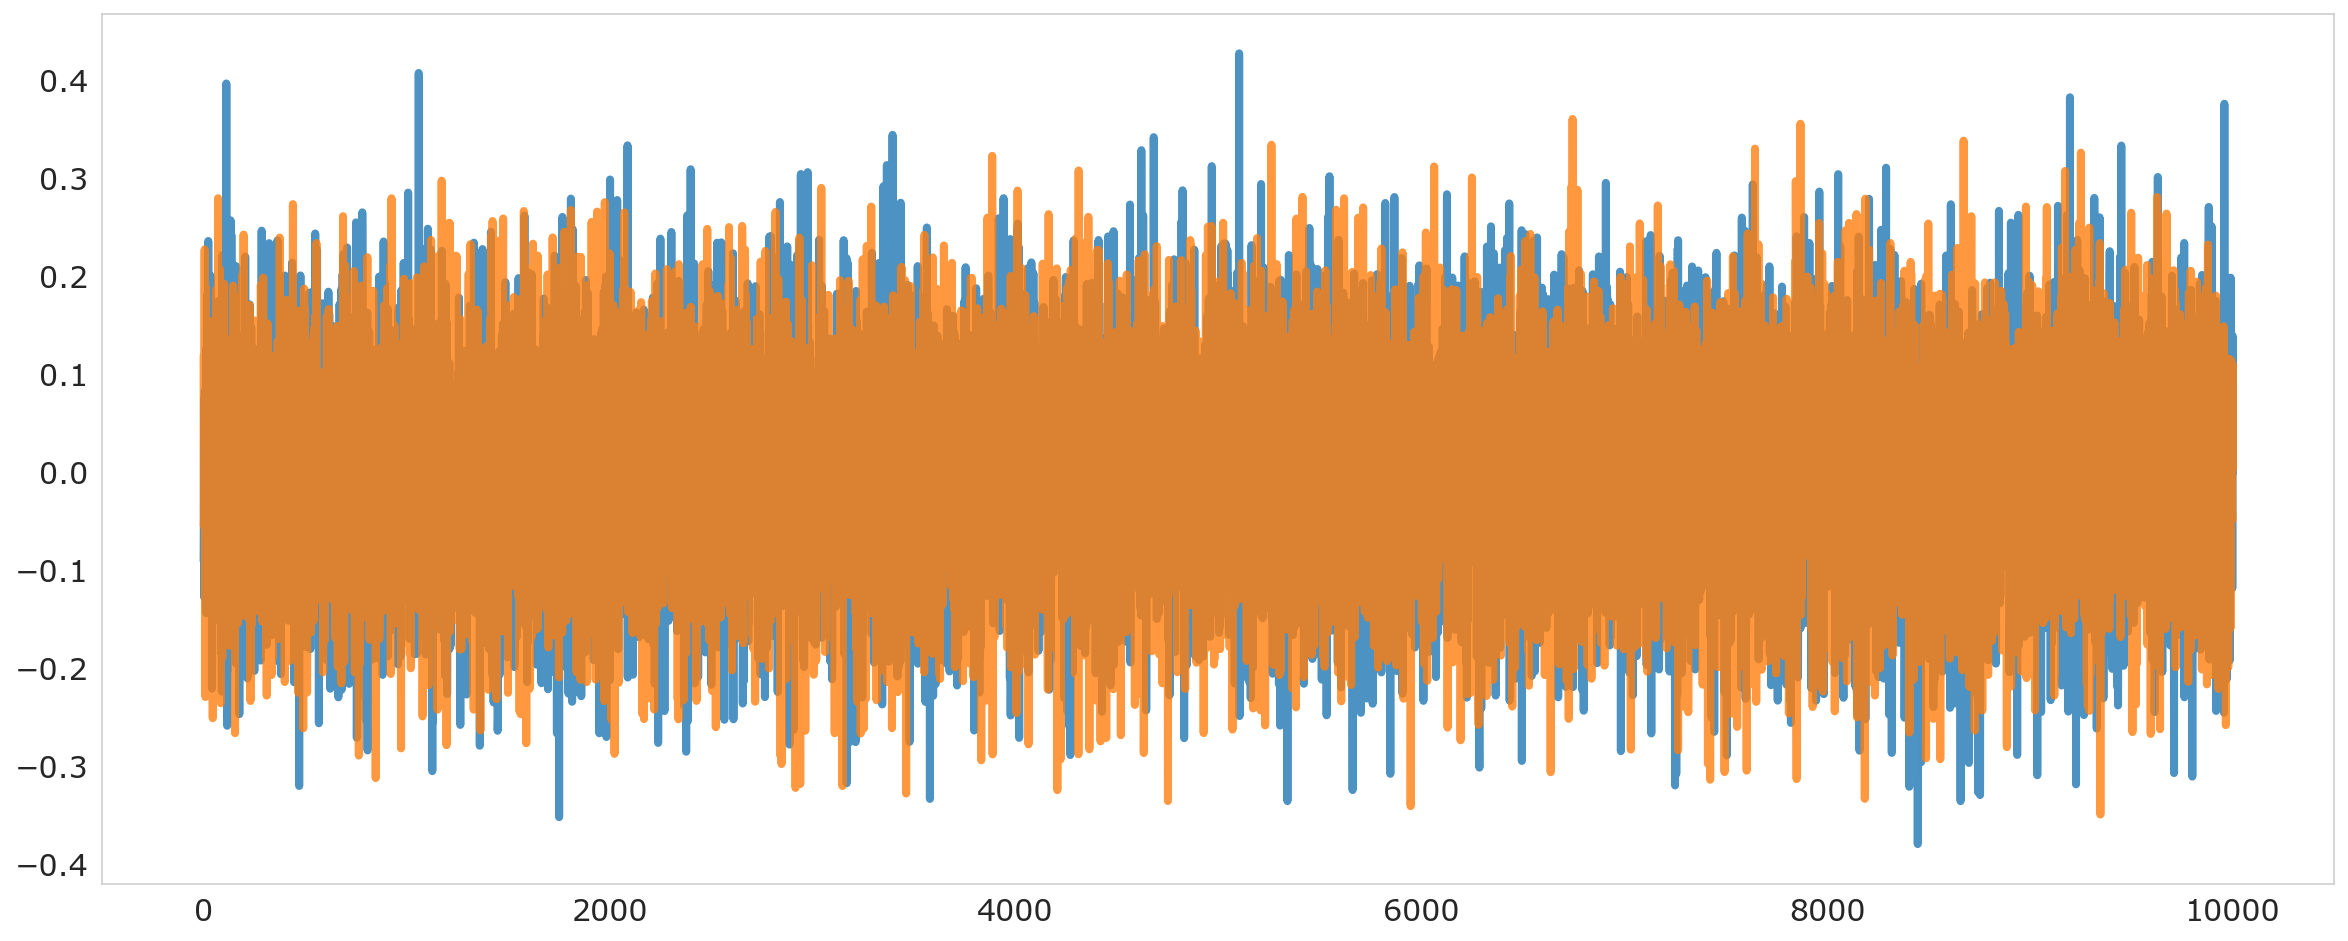

0.7495667805111009 0.0


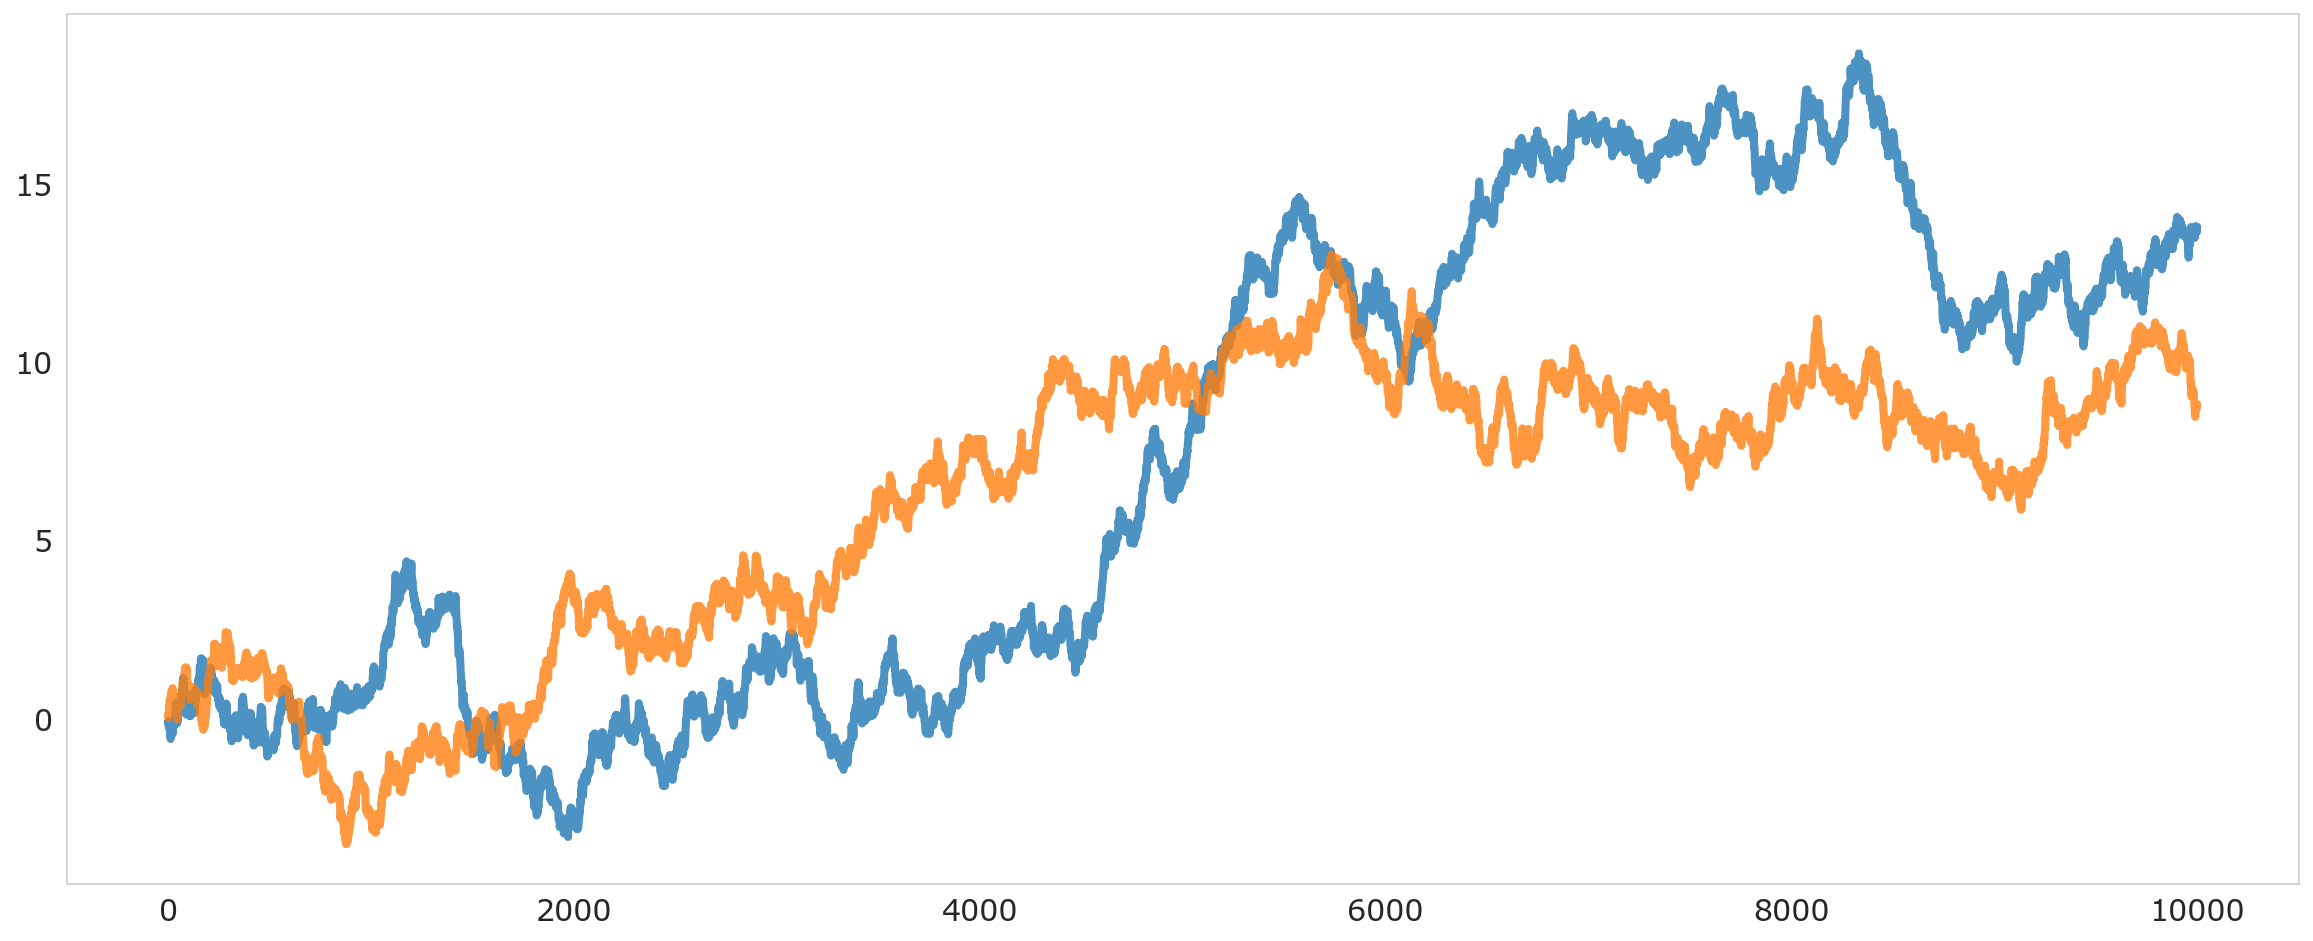

In [89]:
# simulate two white noise time series
s1 = np.random.normal(mu, sigma, data_length)
s2 = np.random.normal(mu, sigma, data_length)

# correlate them
r, p = stats.pearsonr(s1, s2)
print(r, p)
sns.lineplot(data=s1, alpha=0.8, linewidth = 4.)
sns.lineplot(data=s2, alpha=0.8, linewidth = 4.)
plt.show()

# now do the same, but for the cumulate sum of the two
# this simulates brownian noise
s1_cumulative = np.cumsum(s1)
s2_cumulative = np.cumsum(s2)
r, p = stats.pearsonr(s1_cumulative, s2_cumulative)
print(r, p)
sns.lineplot(data=s1_cumulative, alpha=0.8, linewidth = 4.)
sns.lineplot(data=s2_cumulative, alpha=0.8, linewidth = 4.)
plt.show()


0.00011056155654432187 0.48488218190456145


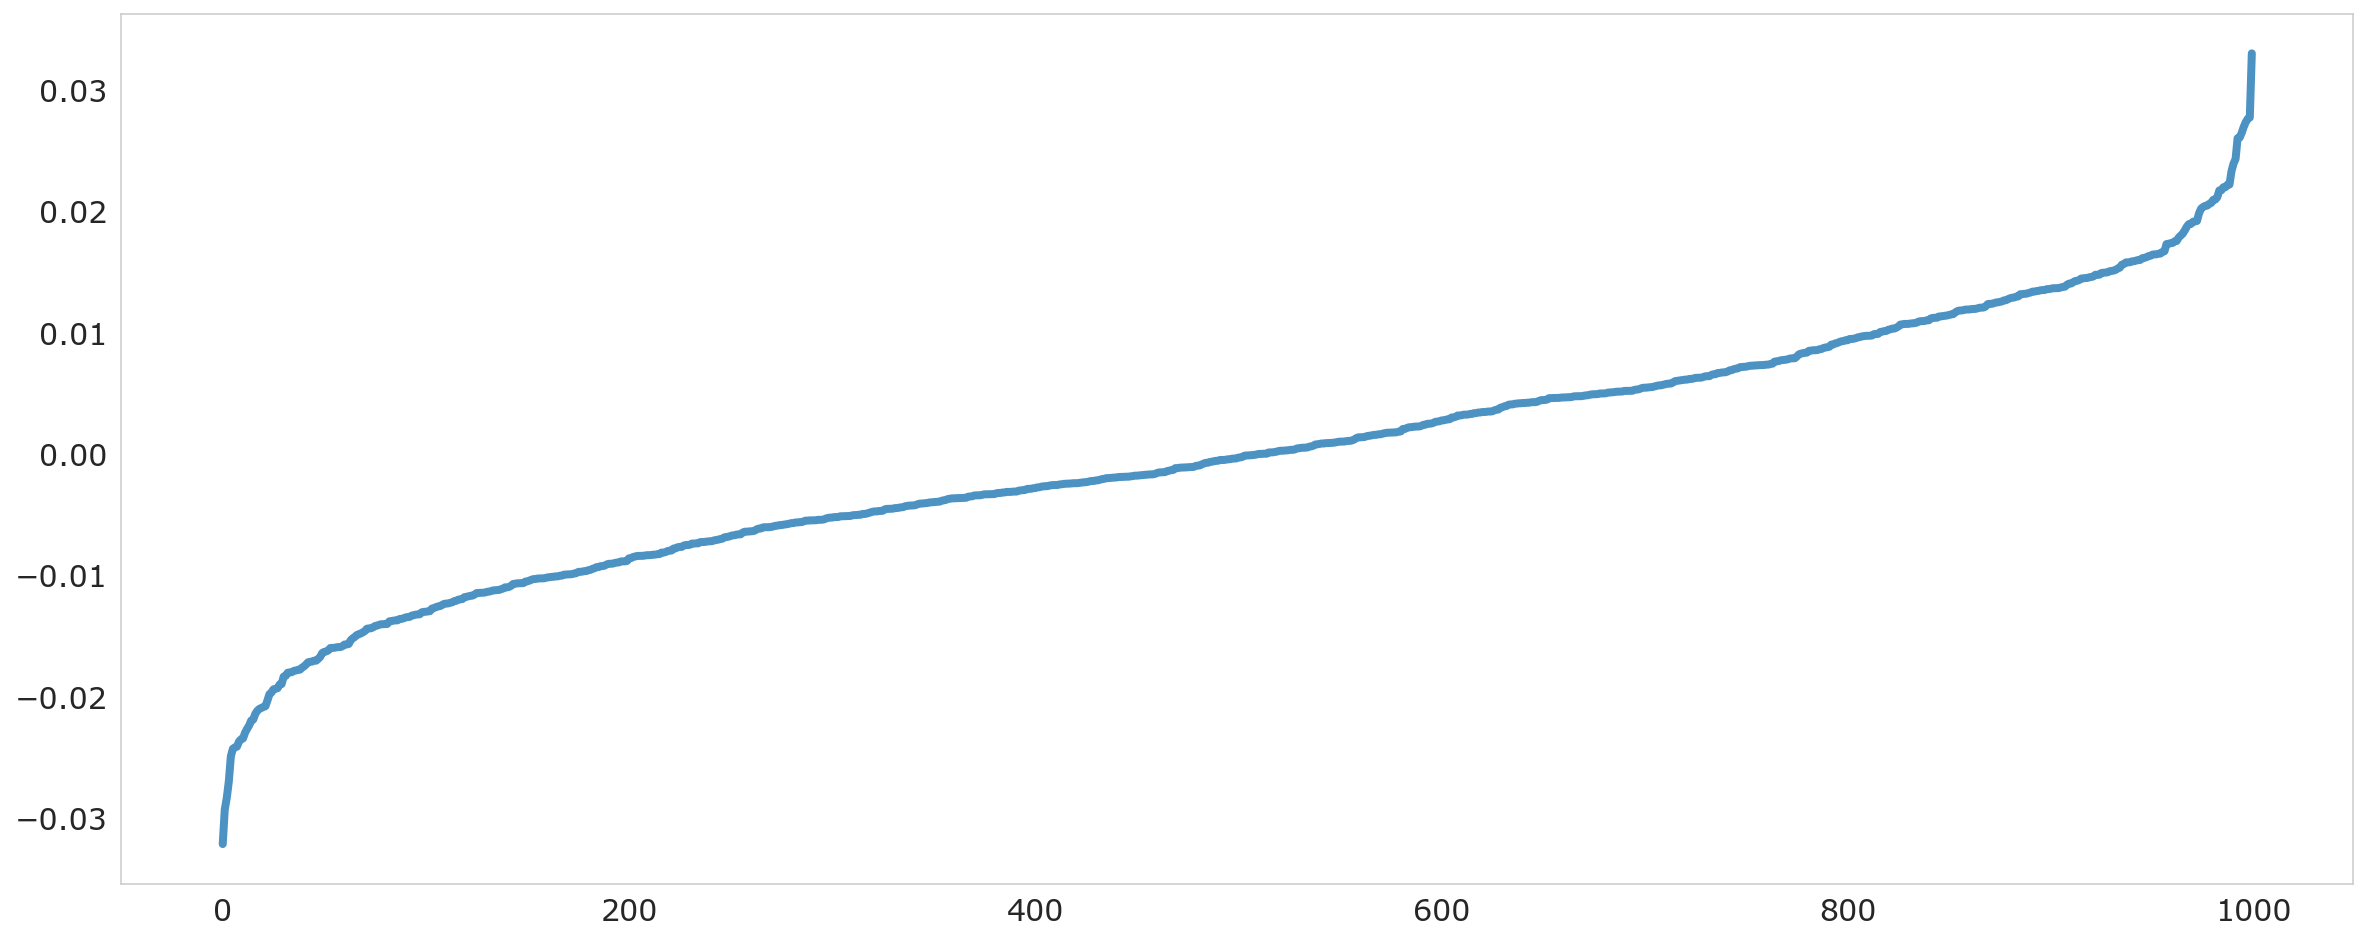

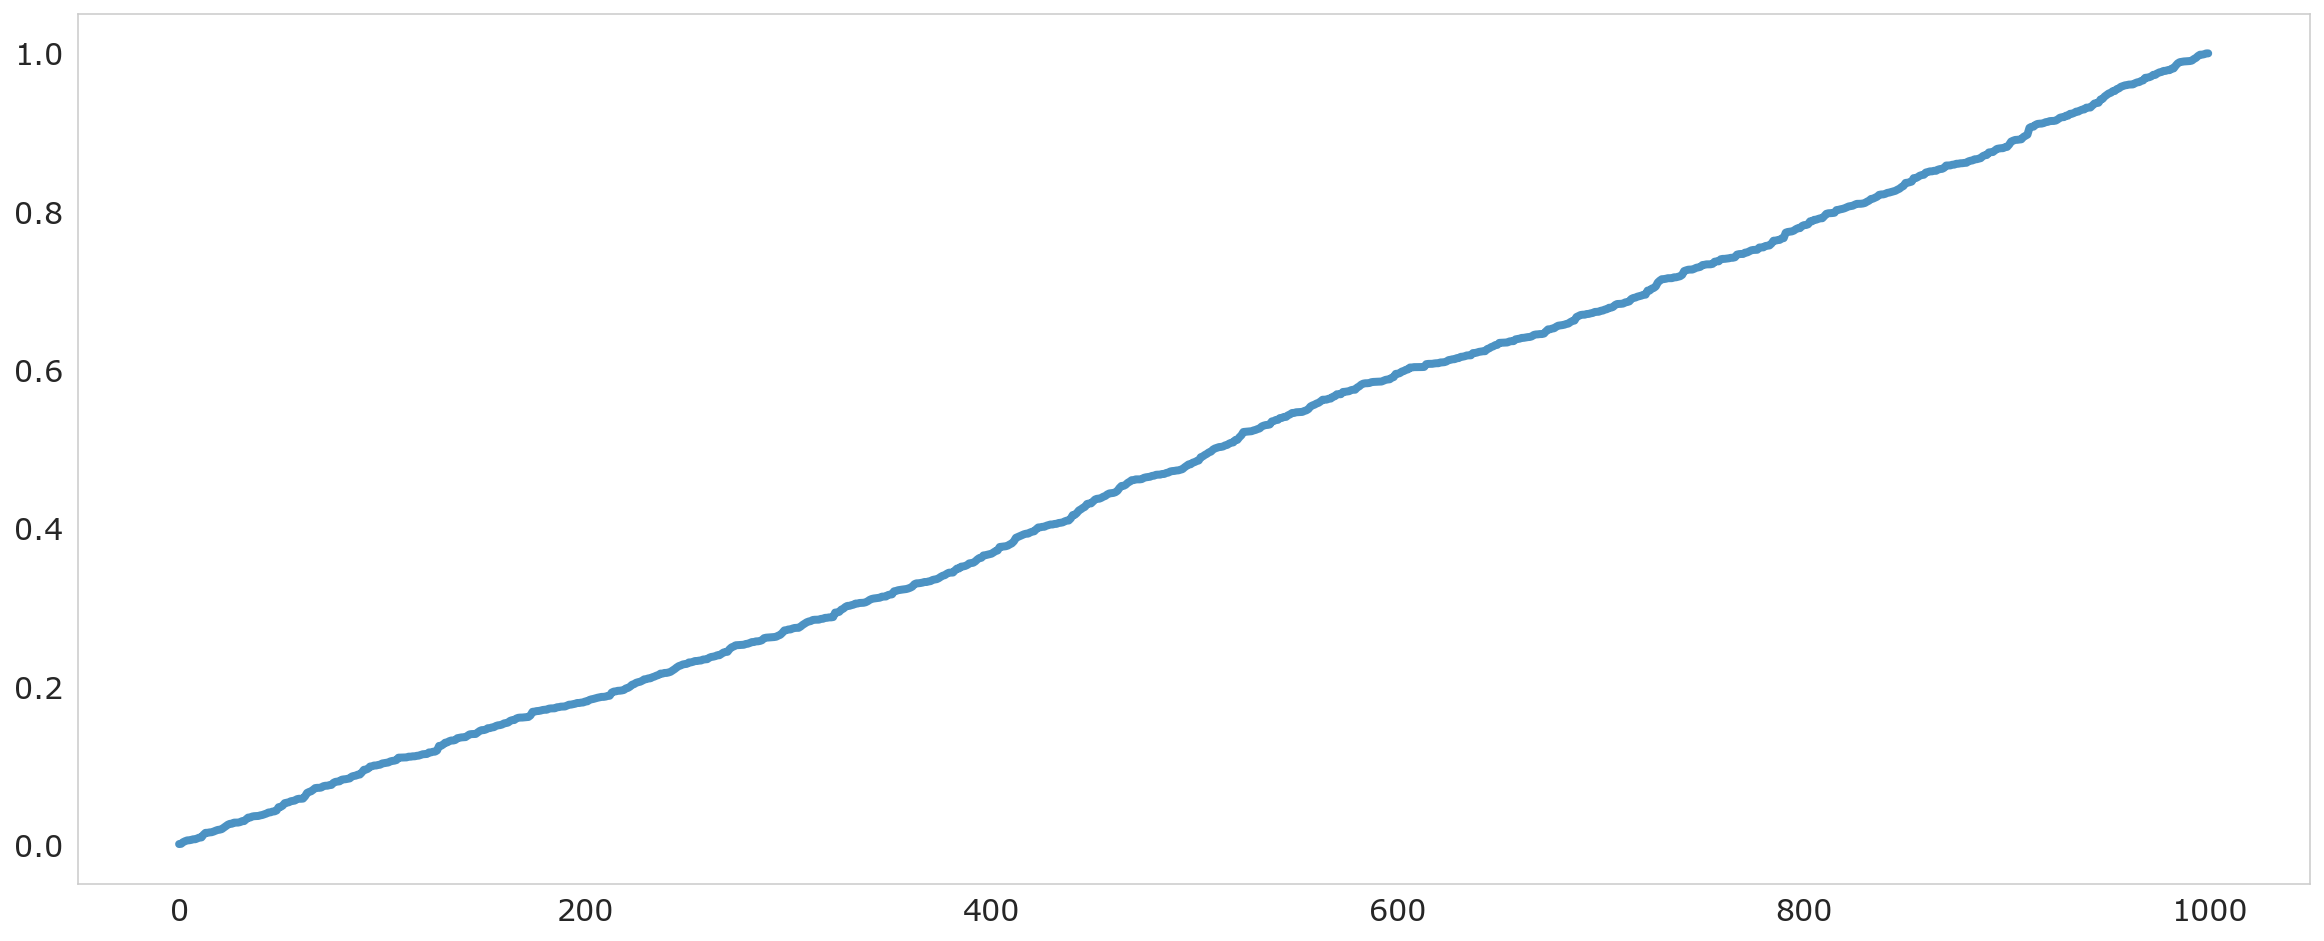

In [97]:
# now simulate MANY time series pairs, and show the distribution of all correlations
    # between simulated pairs

all_r = np.zeros(simulation_runs)
all_p = np.zeros(simulation_runs)

for i in np.arange(simulation_runs):
    s1 = np.random.normal(mu, sigma, data_length)
    s2 = np.random.normal(mu, sigma, data_length)
    all_r[i], all_p[i] = stats.pearsonr(s1, s2)

print(np.mean(all_r), np.mean(all_p))
sns.lineplot(data=np.sort(all_r), alpha=0.8, linewidth = 4.)
plt.show()
sns.lineplot(data=np.sort(all_p), alpha=0.8, linewidth = 4.)
plt.show()

0.00973321846671135 0.009009657327235578


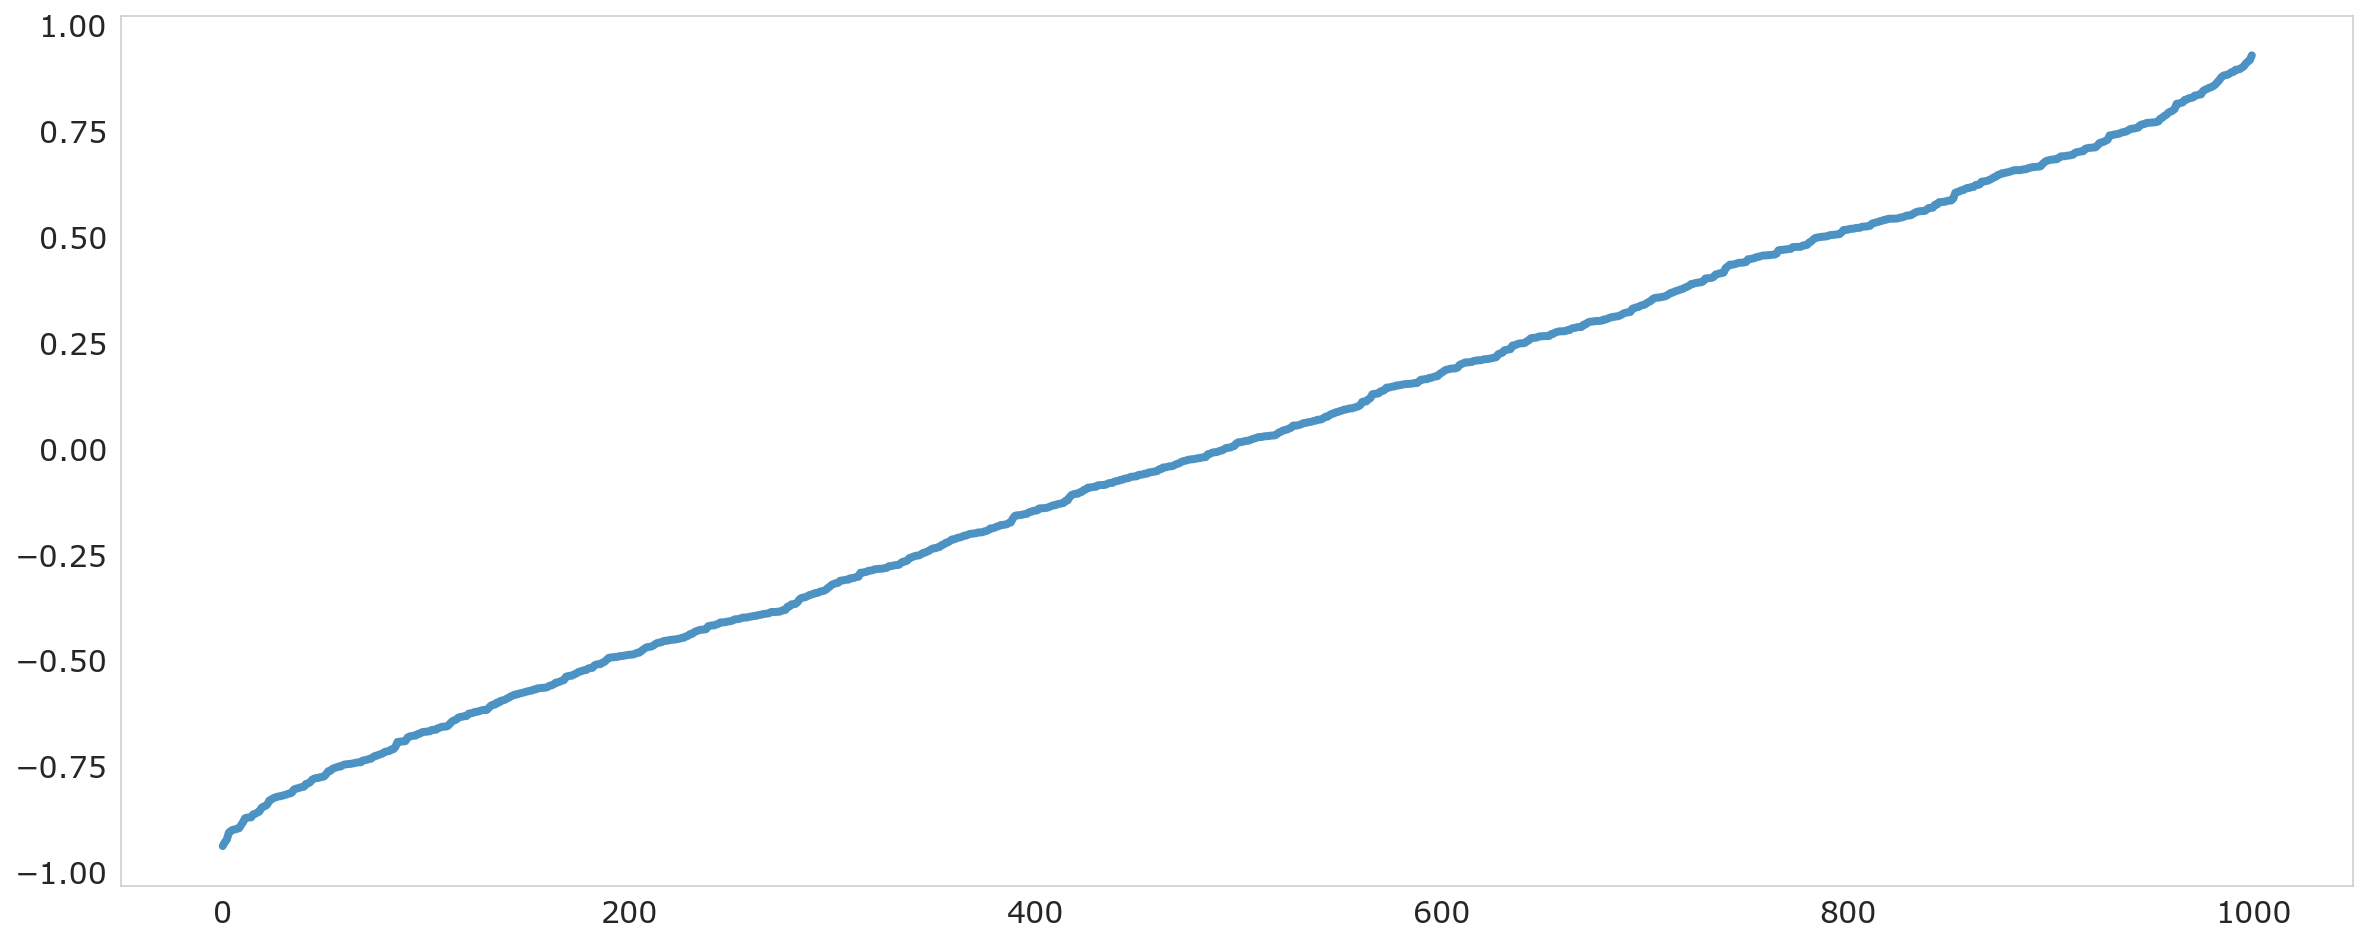

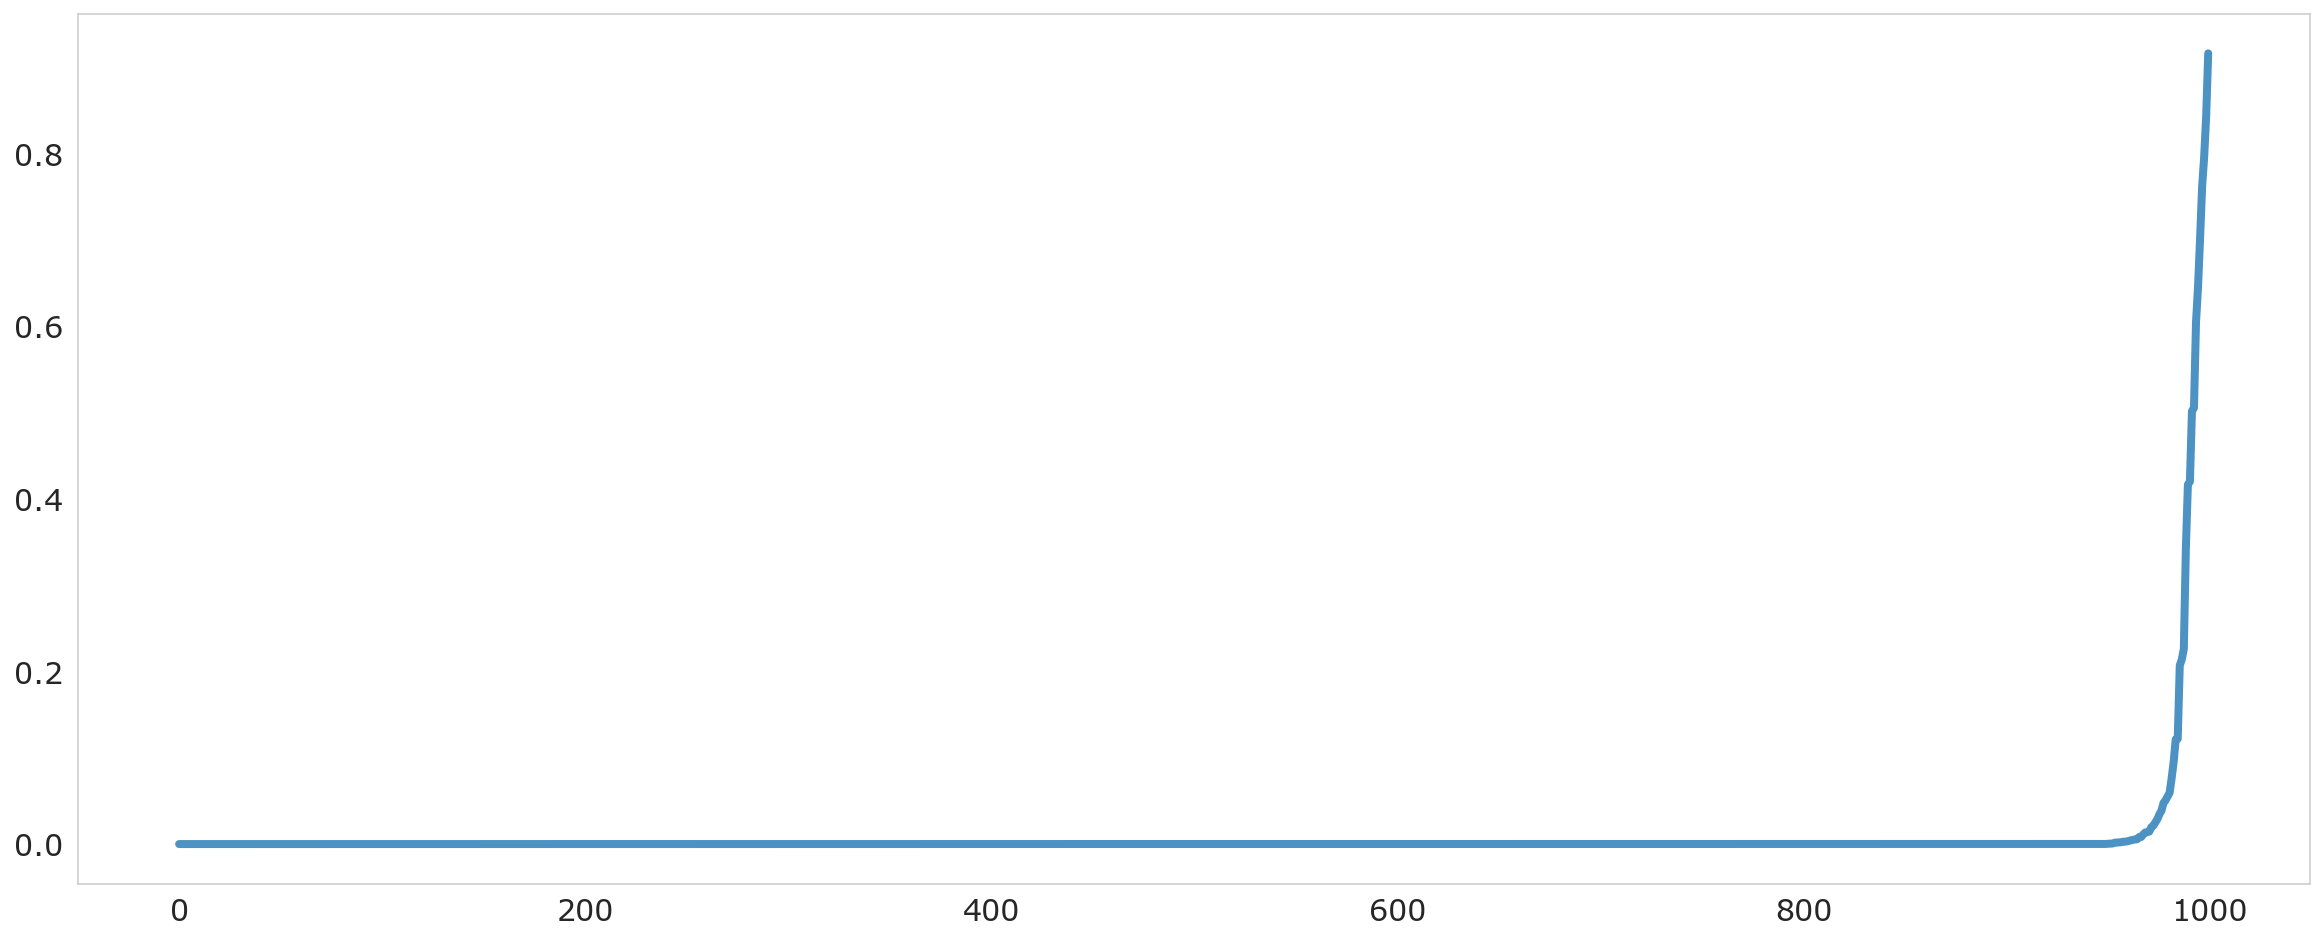

In [98]:
# same thing, but for the cumulative sums of the time series pairs instead

all_r = np.zeros(simulation_runs)
all_p = np.zeros(simulation_runs)

for i in np.arange(simulation_runs):
    s1 = np.random.normal(mu, sigma, data_length)
    s1 = np.cumsum(s1)
    s2 = np.random.normal(mu, sigma, data_length)
    s2 = np.cumsum(s2)
    all_r[i], all_p[i] = stats.pearsonr(s1, s2)

print(np.mean(all_r), np.mean(all_p))
sns.lineplot(data=np.sort(all_r), alpha=0.8, linewidth = 4.)
plt.show()
sns.lineplot(data=np.sort(all_p), alpha=0.8, linewidth = 4.)
plt.show()

-0.005588346486153501 0.008562388571485323


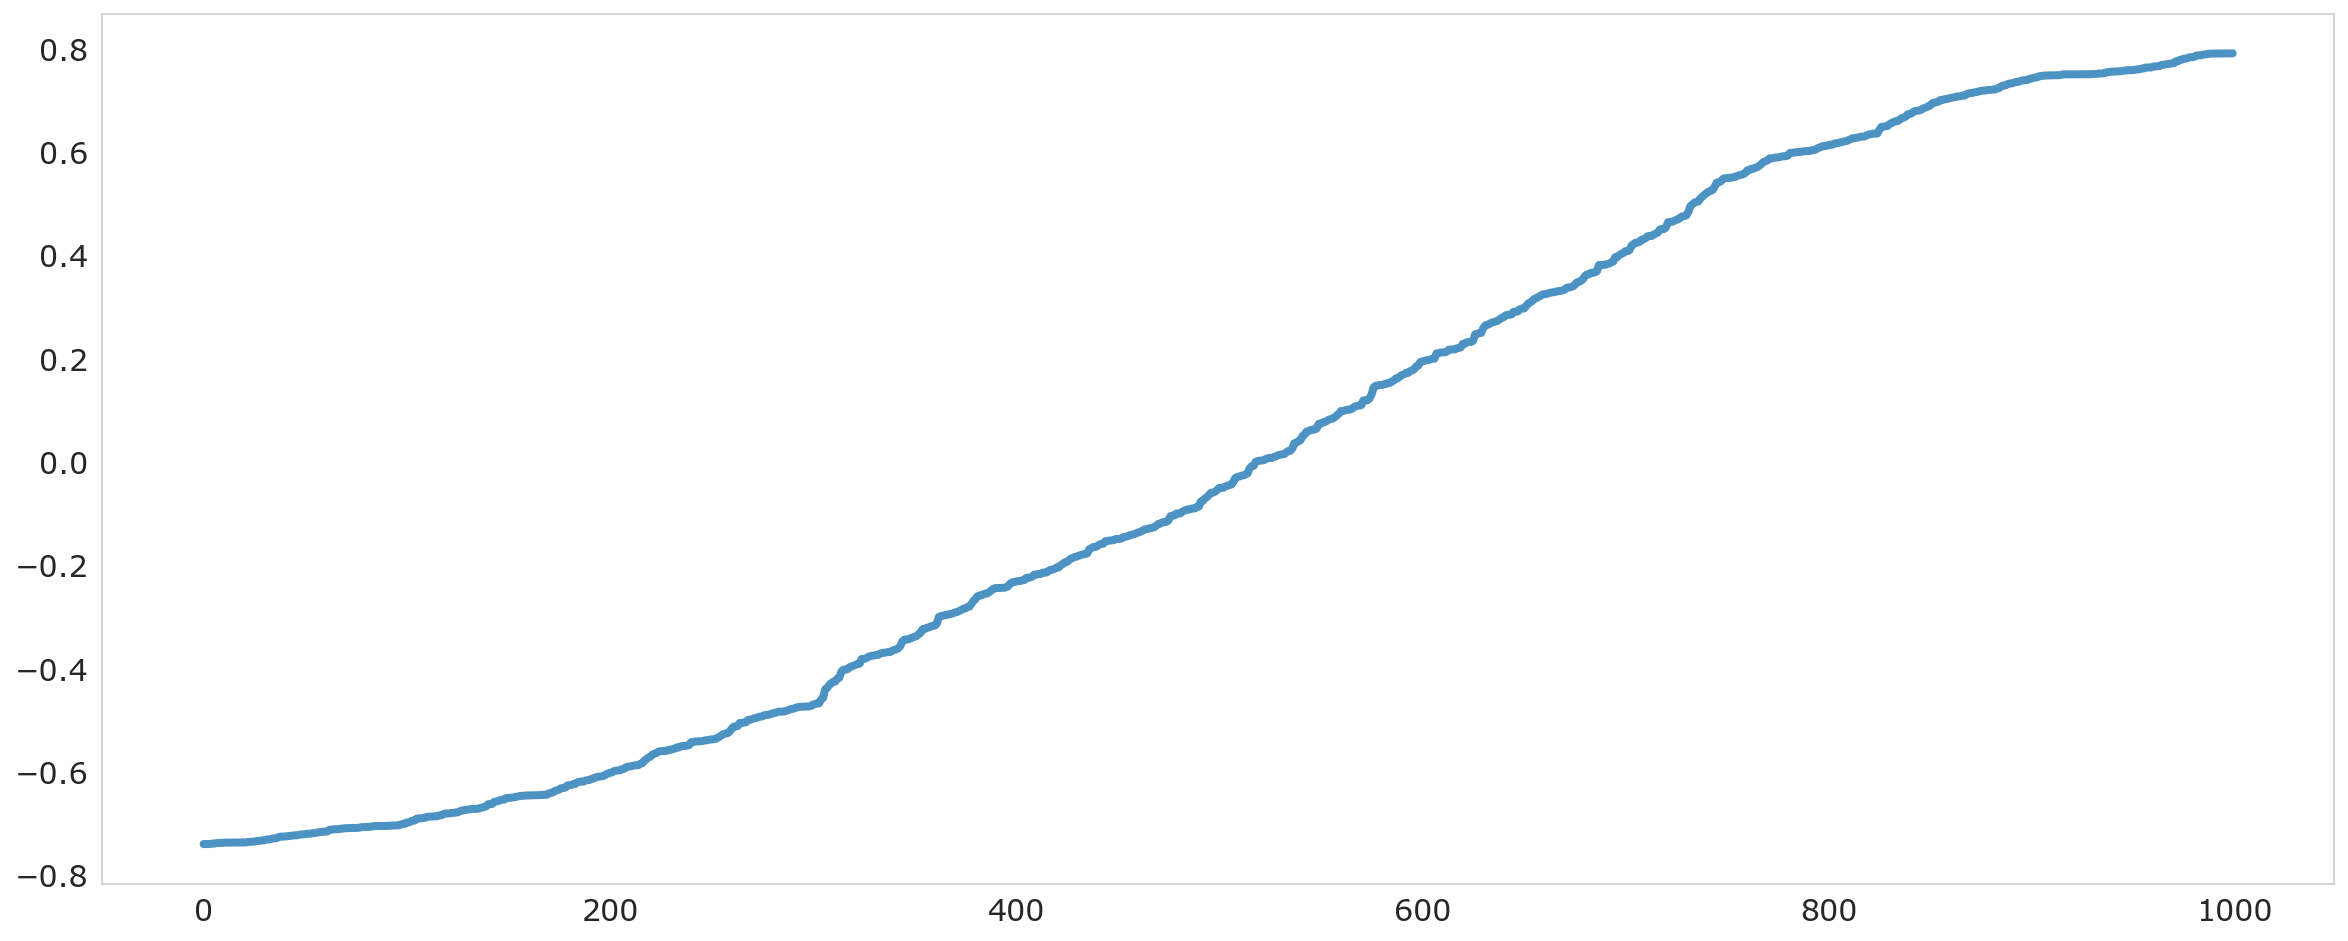

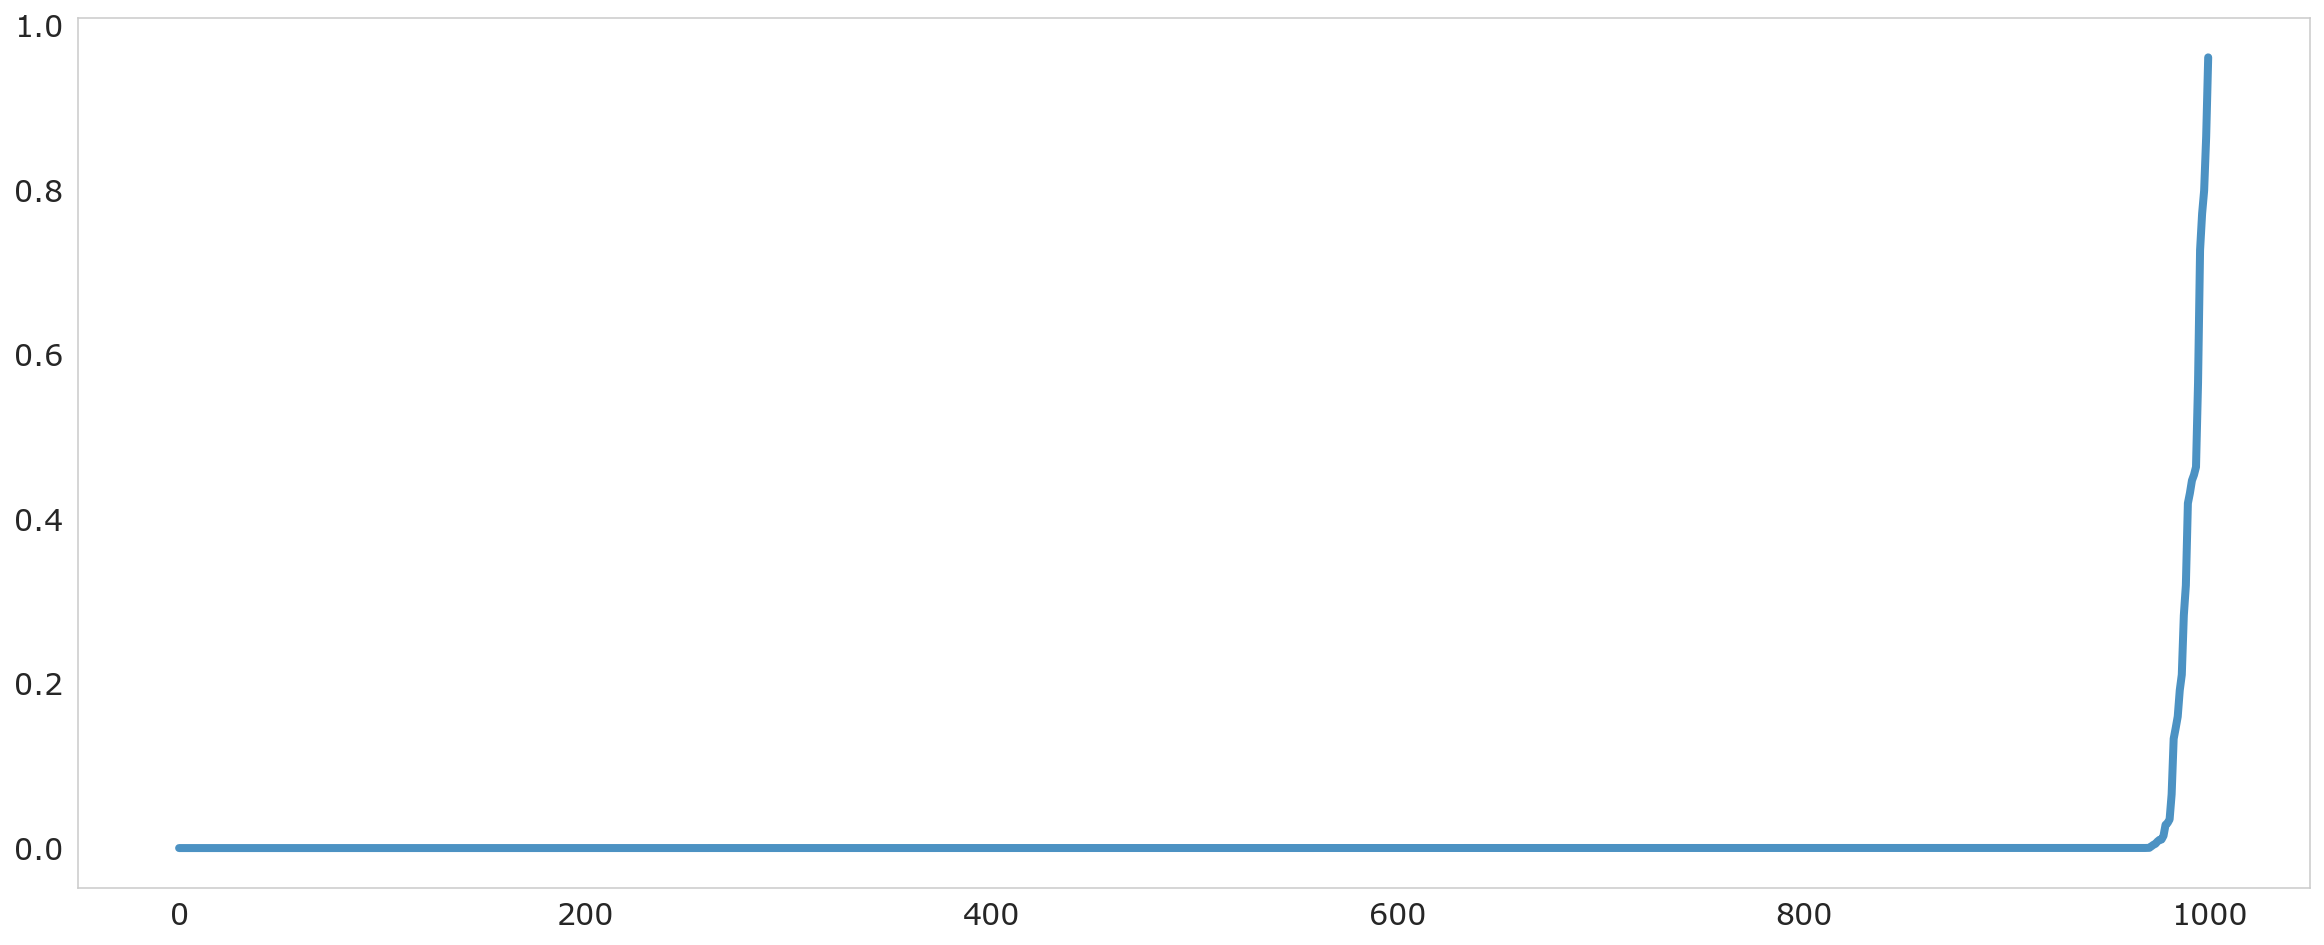

In [94]:
# now 
all_r = np.zeros(simulation_runs)
all_p = np.zeros(simulation_runs)
random_shifts = np.random.uniform(0, data_length, simulation_runs)

s1 = np.random.normal(mu, sigma, data_length)
s1 = np.cumsum(s1)
s2 = np.random.normal(mu, sigma, data_length)
s2 = np.cumsum(s2)
for i in np.arange(simulation_runs):
    all_r[i], all_p[i] = stats.pearsonr(s1, np.roll(s2, np.int(random_shifts[i])))

print(np.mean(all_r), np.mean(all_p))
sns.lineplot(data=np.sort(all_r), alpha=0.8, linewidth = 4.)
plt.show()
sns.lineplot(data=np.sort(all_p), alpha=0.8, linewidth = 4.)
plt.show()